In [2]:
import numpy as np
import cv2
import tensorflow as tf
import keras

Using TensorFlow backend.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
X = np.load('/content/drive/My Drive/SunglassesDataset.npy', allow_pickle=True)

In [4]:
X = []
for i in range(313):
  img = cv2.imread("/content/drive/My Drive/Intermediate_Assignment_Dataset/NoSunglasses"+ f"{i}" + ".pgm")
  img_array = keras.preprocessing.image.img_to_array(img)
  X.append(img_array)

for i in range(311):
  img = cv2.imread("/content/drive/My Drive/Intermediate_Assignment_Dataset/YesSunglasses"+ f"{i}" + ".pgm")
  img_array = keras.preprocessing.image.img_to_array(img)
  X.append(img_array)



In [5]:
np.save('/content/drive/My Drive/SunglassesDataset.npy', X)

In [8]:
y = []
for i in range(313):
  y.append(0)
for i in range(311):
  y.append(1)

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [16]:
model.fit(x=X_train, y=y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Train on 399 samples, validate on 100 samples
Epoch 1/100
399/399 [==============================] - 62s 155ms/step - loss: 873.2214 - accuracy: 0.4536 - val_loss: 51.6307 - val_accuracy: 0.5800
Epoch 2/100
399/399 [==============================] - 57s 143ms/step - loss: 41.9877 - accuracy: 0.5313 - val_loss: 4.4312 - val_accuracy: 0.5400
Epoch 3/100
399/399 [==============================] - 61s 154ms/step - loss: 4.4134 - accuracy: 0.5739 - val_loss: 1.8619 - val_accuracy: 0.7000
Epoch 4/100
399/399 [==============================] - 57s 142ms/step - loss: 2.3533 - accuracy: 0.6291 - val_loss: 0.4702 - val_accuracy: 0.8000
Epoch 5/100
399/399 [==============================] - 57s 142ms/step - loss: 1.2586 - accuracy: 0.7444 - val_loss: 0.2909 - val_accuracy: 0.8600
Epoch 6/100
399/399 [==============================] - 57s 142ms/step - loss: 0.7876 - accuracy: 0.7970 - val_loss: 0.2517 - val_accuracy: 0.9300
Epoch 7/100
399/399 [==============================] - 56s 141ms/step - lo

In [18]:
from tensorflow.keras.models import load_model
model.save('SunglassesModel.h5')

In [19]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

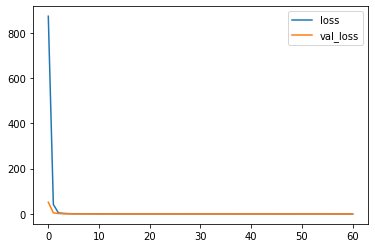

In [20]:
losses[['loss', 'val_loss']].plot()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
predictions = model.predict_classes(X_test)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.92      0.98      0.95        61

    accuracy                           0.95       125
   macro avg       0.95      0.95      0.95       125
weighted avg       0.95      0.95      0.95       125



In [24]:
print(confusion_matrix(y_test, predictions))

[[59  5]
 [ 1 60]]
